# The London night tube and the night time economy 

## Data import and merging

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

First we need to combine the station line (wikitable to csv from [here](https://wiki.openstreetmap.org/wiki/List_of_London_Underground_stations)) and [station postcode](https://www.doogal.co.uk/london_stations.php) CSV files.

In [3]:
df_sl = pd.read_csv('data/station_lines.csv')

In [4]:
df_sl.head()

,Name,Latitude,Longitude,Platform / Entrance,Collected By,Collected On,Line,Step free
0,Acton Town,51.502500,-0.278126,Platform,User:Gagravarr,24/11/06,"District, Piccadilly",NaN
1,Acton Central,51.50883531,-0.263033174,Entrance,User:Firefishy,08/05/2007,London Overground,NaN
2,Acton Central,51.50856013,-0.262879534,Platform,User:Firefishy,08/05/2007,London Overground,NaN
3,Aldgate,51.51394,-0.07537,Aldgate High Street entrance,User:Morwen,28/4/2007,Metropolitan,No
4,Aldgate East,51.51514,-0.07178,Entrance,User:Parsingphase,(2006),"District, Hammersmith & City",NaN


In [5]:
df_sp = pd.read_csv('data/London stations.csv')

In [6]:
df_sp.head()

,Station,OS X,OS Y,Latitude,Longitude,Zone,Postcode
0,Abbey Road,539081,183352,51.531952,0.003723,3,E15 3NB
1,Abbey Wood,547297,179002,51.490784,0.120272,4,SE2 9RH
2,Acton Central,520613,180299,51.508758,-0.263430,2,W3 6BD
3,Acton Main Line,520296,181196,51.516887,-0.267690,3,W3 0BP
4,Acton Town,519457,179639,51.503071,-0.280303,3,W3 8HN


We'd just like the stations on the Central and the Victoria lines (the initial night tube lines at the launch).

In [7]:
df_sl.loc[df_sl['Line'].str.contains('Central') | df_sl['Line'].str.contains('Victoria')].head()

,Name,Latitude,Longitude,Platform / Entrance,Collected By,Collected On,Line,Step free
14,Bank,51.5134047,-0.08905843,Entrance,User:Gagravarr,10/10/06,"Central, Waterloo & City",NaN
17,Barkingside,51.58543,+0.08854,platforms,User:Morwen,21/4/07,Central,NaN
23,Bethnal Green,51.52718,-0.05504,tube station entrance,User:Morwen,2007-05-12,Central,No
25,Blackhorse Road,51.58698,-0.04104,Entrance Hall,User:Firefishy,15/08/2007,Victoria,NaN
26,Bond Street,51.51461,-0.14897,Entrance,User:Mattwestcott,16/02/2007,"Central, Jubilee",No


In [8]:
stations = df_sl.loc[df_sl['Line'].str.contains('Central') | df_sl['Line'].str.contains('Victoria')]['Name']

In [9]:
df_sp.loc[df_sp['Station'].isin(stations)].head()

,Station,OS X,OS Y,Latitude,Longitude,Zone,Postcode
25,Bank,532704,181111,51.513347,-0.089000,1,EC3V 3LA
29,Barkingside,544788,189510,51.585851,0.088477,4,IG6 1NB
50,Bethnal Green,534995,182712,51.527192,-0.055392,2,E2 0ET
59,Blackhorse Road,535914,189256,51.585777,-0.039626,3,E17 6JJ
61,Bond Street,528497,181053,51.513798,-0.149614,1,W1C 2HU


In [10]:
df_sp.loc[df_sp['Station'].isin(stations)].shape

(60, 7)

Now we have a table of stations on the Central or Victoria Lines and their postcodes, although we seem to have lost about 5 stations in the process. Eventually we'd find better datasets, but this sample will be sufficient for now.

Next we need to link these to the MSOA (Middle Layer Super Output Area) tags that we have in the night time economy dataset using a [lookup table](https://data.london.gov.uk/dataset/postcode-directory-for-london).

In [11]:
df_pc = pd.read_excel('data/London_postcode-ONS-postcode-Directory-May15.xlsx')

In [12]:
msoas = df_pc.loc[df_pc['pcds'].isin(df_sp.loc[df_sp['Station'].isin(stations)]['Postcode'])]['msoa11']

In [13]:
msoas.shape

(43,)

Again, we have lost some stations but this could be where the lines intersect or multiple stations lie in the same MSOA. 43 MSOAs is enough for this preliminary analysis.

Now we need to filter our night time economy dataset to the correct MSOAs to study growth.

In [31]:
df_nt = pd.read_excel('data/night-time-economy.xls', sheet_name='NTE businesses London MSOAs')

In [32]:
df_nt.head()

,"Number of workplaces in the Night Time Economy in London MSOAs, 2001-2017",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Area code,Area name,Night Time Economy category,Year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,2001,2002.0,2003.0,2004.0,2005.0,2006.0,2007.0,2008.0,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0
3,K02000001,United Kingdom,Cultural and leisure activities,240595,243430.0,241400.0,242270.0,246715.0,248025.0,251125.0,255075.0,257085.0,247925.0,238895.0,244695.0,243700.0,249925.0,266180.0,268995.0,274795.0
4,E12000007,London,Cultural and leisure activities,43205,43675.0,43085.0,42520.0,42845.0,42930.0,43260.0,43905.0,44835.0,43350.0,42280.0,44615.0,45340.0,47000.0,49435.0,50515.0,52215.0


In [33]:
df_nt.columns = list(df_nt.iloc[1,:3]) + list(df_nt.iloc[2,3:])
df_nt = df_nt.iloc[3:5910]

Let's filter to the aggregated data.

In [35]:
df_nt = df_nt.loc[df_nt['Night Time Economy category'] == 'Total in all sectors']

Now we have reformatted and filtered the dataframe, we shall filter to the correct Area codes.

In [38]:
df_nt = df_nt.loc[df_nt['Area code'].isin(msoas)]

We wish to assess the _growth_ of each of the areas - we will use fractional growth in employment.

In [39]:
df_ntp = df_nt.copy()
df_ntp.iloc[:,3:] = df_nt.iloc[:,3:].pct_change(axis=1)
df_ntp.head()

,Area code,Area name,Night Time Economy category,2001,2002.0,2003.0,2004.0,2005.0,2006.0,2007.0,2008.0,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0
5120,E02000191,Camden,Total in all sectors,NaN,-0.029851,-0.010256,0.007772,0.035990,-0.024814,0.02799,-0.002475,0.037221,-0.004785,-0.004808,0.077295,0.004484,0.029018,0.043384,0.045738,0.023857
5170,E02000241,Ealing,Total in all sectors,NaN,0.025641,-0.025000,0.000000,-0.051282,0.081081,0.05000,0.047619,0.022727,-0.044444,-0.046512,0.121951,0.043478,0.125000,0.129630,0.000000,0.065574
5172,E02000243,Ealing,Total in all sectors,NaN,0.056338,0.026667,-0.012987,0.039474,0.025316,0.00000,-0.012346,0.012500,-0.049383,0.012987,0.038462,0.086420,0.056818,0.064516,0.101010,0.082569
5173,E02000244,Ealing,Total in all sectors,NaN,0.014085,0.027778,0.000000,0.054054,-0.025641,0.00000,0.052632,0.000000,0.037500,-0.024096,0.074074,0.057471,0.065217,0.091837,-0.028037,0.038462
5177,E02000248,Ealing,Total in all sectors,NaN,-0.043478,0.011364,-0.044944,0.094118,0.010753,0.00000,-0.010638,0.000000,0.010753,0.031915,0.216495,0.008475,0.100840,0.152672,0.132450,0.076023


If we use these percentage changes for each MSOA, we are essentially weighting each one equally, regardless of the total number of jobs contained within. We could also aggregate the MSOAs and consider the fractional increase in employment across the length of the lines. This may be a better measure of the overall growth, but could also ignore the effect of outliers.

In [40]:
df_nt.iloc[:,3:].sum().pct_change()[1:]

2002.0   -0.010335
2003.0    0.004655
2004.0   -0.007013
2005.0   -0.008576
2006.0   -0.001399
2007.0    0.016688
2008.0    0.018419
2009.0   -0.002461
2010.0   -0.026764
2011.0   -0.004562
2012.0    0.061108
2013.0    0.028794
2014.0    0.054577
2015.0    0.069667
2016.0    0.042076
2017.0    0.026091
dtype: float64

# Analysis

In [21]:
x = np.array(df_ntp.columns[4:])
y = np.zeros((x.shape[0],df_ntp['Area code'].shape[0]))

for i, year in enumerate(x):
    y[i] = np.array(df_ntp[year])
    
x = np.tile(x, (y.shape[1],1))

data = np.array([x.T,y]).T.reshape((y.shape[1]*y.shape[0],2))

Text(0,0.5,'Fractional growth in employment')

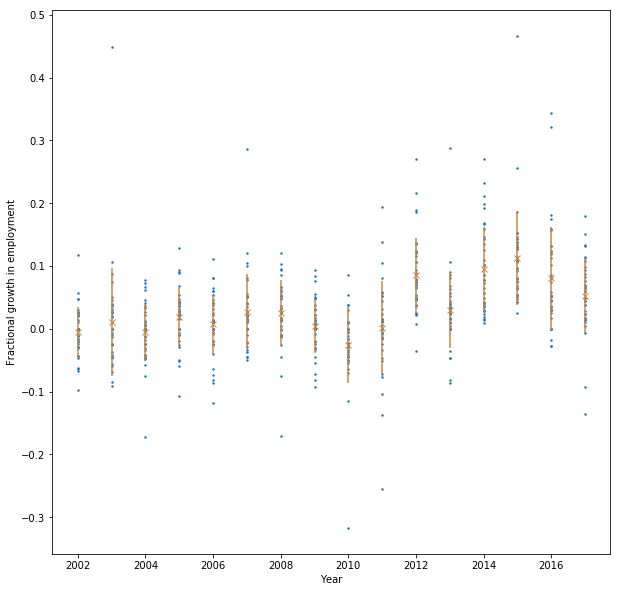

In [22]:
plt.rcParams['figure.figsize'] = [10, 10]
plt.scatter(data[:,0], data[:,1], s=2)
plt.errorbar(np.array(df_ntp.columns[4:]), y.mean(axis=1), yerr=y.std(axis=1), fmt='x', color='peru')
plt.xlabel('Year')
plt.ylabel('Fractional growth in employment')

Also plotting the aggregated percentage increase:

Text(0,0.5,'Fractional growth in employment')

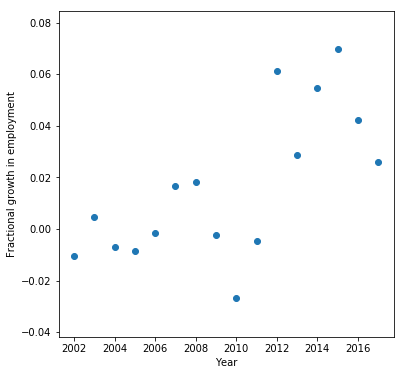

In [23]:
plt.rcParams['figure.figsize'] = [6, 6]
data = df_nt.iloc[:,3:].sum().pct_change()[1:]
plt.scatter(data.index, data)
plt.xlabel('Year')
plt.ylabel('Fractional growth in employment')

These graphs show us the fractional growth in employment in the night time economy in the immediate vicinity of stations on the Central and Victoria underground lines in London. These lines started operating 24hrs every weekend from **19th August 2016**, hence we may expect an increase in employment growth after this point, as businesses grow or new businesses are formed.

However, no such increase is seen here - from this small sample we could suggest that any increased volume of business activity due to the night tube has been out-weighed by other negative factors, or perhaps that the night tube is yet to stimulate proper growth in employment.  

**Note:** the accompanying data notes tell us that a change in the type of businesses included in the dataset added over 100,000 new businesses across England and Wales in 2015 which could account for a relatively high growth seen in this year.

## Growth in subsectors

Above we looked at the _total_ increase in night time employment, let's instead look at the individual subsectors.

In [60]:
df_nt = pd.read_excel('data/night-time-economy.xls', sheet_name='NTE businesses London MSOAs')
df_nt.columns = list(df_nt.iloc[1,:3]) + list(df_nt.iloc[2,3:])
df_nt = df_nt.iloc[3:5910]

In [61]:
df_nt['Night Time Economy category'].unique()

array(['Cultural and leisure activities',
       'Activities which support night time cultural and leisure activities',
       '24-hour health and personal social services',
       'Activities which support wider social and economic activities',
       'Any Night Time Economy category', 'Total in all sectors'],
      dtype=object)

In [62]:
df_nt = df_nt.loc[(df_nt['Night Time Economy category'] == 'Cultural and leisure activities') | (df_nt['Night Time Economy category'] == 'Activities which support night time cultural and leisure activities')]

Text(0,0.5,'Fractional growth in employment')

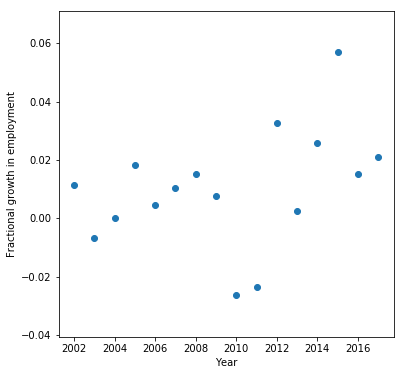

In [63]:
plt.rcParams['figure.figsize'] = [6, 6]
data = df_nt.iloc[:,3:].sum().pct_change()[1:]
plt.scatter(data.index, data)
plt.xlabel('Year')
plt.ylabel('Fractional growth in employment')

In [64]:
(df_nt[2017].sum()-df_nt[2016].sum())-(df_nt[2016].sum()-df_nt[2015].sum())

2950.0

So, whilst the overall growth in the night time employment has slowed, if we consider the 'Cultural and leisure activities' (and activities which support it) subsector we see an increase in job growth of 2950 jobs/year (although it's again hard to tell whether this is statistically significant on this single year from a small sample). This could suggest that this subsector has been quicker to react to the changes.

## Summary

### Initial findings

- Total job growth in the night time economy surrounding the Central and Victoria lines has decreased.
- Job growth within the 'Cultural and leisure activities' (and activities which support it) subsector has increased.

### Future extension

- Include recently added 24hr underground lines.
- Develop a more sophisticated means of sampling the MSOAs which benefit from the night tube.
- Include richer data on London's night-time economy.